# TP1 Lois de Descartes

Ceci est un exemple de traitement des donnée issues d'un TP. Remplacez les données déjà présentes par vos mesures.

## Loi de la réfraction

On mesure les angles d'incidence $i_1$ et de réfraction $i_2$ et on trace la courbe de $\sin(i_1)$ en fonction de $\sin(i_2)$

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Valeurs de l'angle i1
i1 =  np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
# Incertitude sur les valeurs de i1
ui1 = np.array([0.5, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2])
# Valeurs de l'angle i2
i2 = np.array([0, 4,  7, 10, 14, 16, 20, 23, 25, 29, 31, 34, 35, 38, 40, 41, 41, 44])
# Incertitude sur les valeurs de i2
ui2 = np.array([0.5, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2])

Il faut maintenant créer les listes contenant $\sin(i_1)$ et $\sin(i_2)$ ainsi que les listes contenant les incertitudes sur ces deux valeurs. Pour déterminer l'incertitude $u(\sin(i))$ sur $\sin(i)$ à partir de l'incertitude $u(i)$ sur $i$, on utilise la relation (voir poly sur les incertitudes)
$$
u(\sin(i)) = \left|\frac{\mathrm{d}}{\mathrm{d}i}\big(\sin(i)\big)\right|\times u(i) = |\cos(i)|\times u(i)
$$

Pour que cela fonctionne, il faut que toutes les valeurs des angles soient en radians. On a donc 

In [8]:
sin_i1 = np.sin(i1*np.pi/180)
sin_i2 = np.sin(i2*np.pi/180)
usin_i1 = np.cos(i1*np.pi/180)*ui1*np.pi/180
usin_i2 = np.cos(i2*np.pi/180)*ui2*np.pi/180

On trace le graphique représentatif de $\sin(i_1)$ en fonction de $\sin(i_2)$

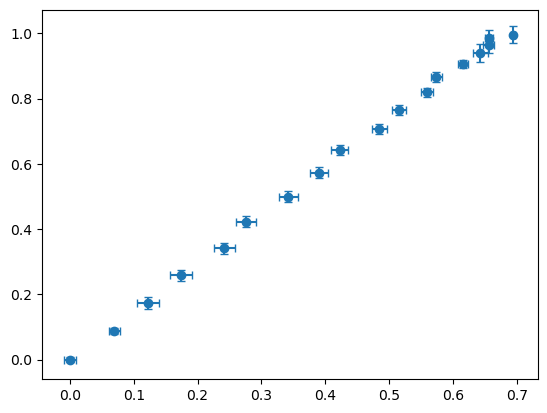

In [9]:
plt.figure()
plt.errorbar(sin_i2,sin_i1, xerr=usin_i1, yerr=usin_i2, fmt="o", capsize=3)
plt.show()

Le graphique obtenu ressemble beaucoup à une droite, c'est ce qu'on attend théoriquement, car la loi de Descartes de la réfraction donne la relation entre les angles $i_1$ et $i_2$ suivante
$$
\sin(i_1) = n\sin(i_2)
$$
On s'attend donc à obtenir une droite de coefficient directeur égal à $n$.

Il faut qu'on le vérifie plus précisément. On utilise la régression linéaire pour déterminer les paramètres de la droite et l'ajouter sur le graphique

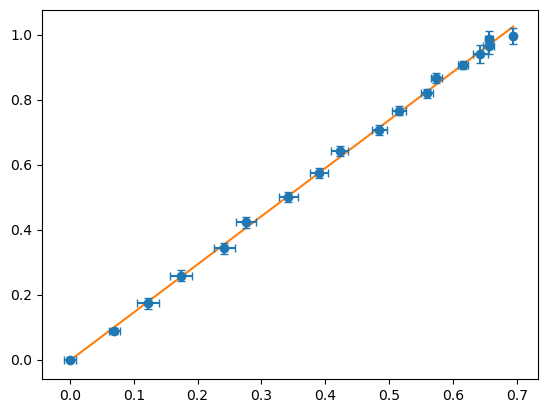

In [10]:
a,b = np.polyfit(sin_i2, sin_i1, 1)
x = np.array([sin_i2[0], sin_i2[-1]])
y = a*x + b 
plt.errorbar(sin_i2,sin_i1, xerr=usin_i1, yerr=usin_i2, fmt="o", capsize=3)
plt.plot(x,y, zorder=1) # On affiche la droite 
plt.show()

La droite obtenue passe dans les barres d'erreur des points de mesure, on en conclut que les mesures obtenues sont compatibles avec la loi de Descartes de la réfraction. Et le résultat de la régression linéaire nous donne la valeur de l'indice $n$ du plexiglas. 

In [11]:
print("Indice du plexiglas : n={}".format(a))

Indice du plexiglas : n=1.4789633391173844


Déterminons maintenant une estimation de l'incertitude sur la valeur de $n$ déterminée par cette méthode en utilisant la méthode de _Monte-Carlo_ (voir le notebook sur le traitement des données)

In [12]:
Nexp = 1000 # Nombre de simulations de points de mesure 
la = [] # Liste des valeurs du paramètre a 
lb = [] # Liste des valeurs du paramètre b 
for k in range(Nexp): 
    temp_sin_i1 = np.random.normal(sin_i1, usin_i1) # Simulation aléatoire de valeurs de sin(i1)
    temp_sin_i2 = np.random.normal(sin_i2, usin_i2) # Simulation aléatoire de valeurs de sin(i2)
    a,b = np.polyfit(temp_sin_i2, temp_sin_i1, 1) # Régression linéaire 
    la.append(a) 
    lb.append(b) 
print("Équation de la droite : i=au+b") 
print("a = {} ± {}".format(np.average(la), np.std(la))) 
print("b = {} ± {}".format(np.average(lb), np.std(lb))) 

Équation de la droite : i=au+b
a = 1.4710599008935215 ± 0.031446679100786856
b = 0.0006576506102860042 ± 0.013114037271323632


On en déduit finalement l'estimation de la valeur de l'indice de réfraction du plexiglas
$$
 n = 1.47 \pm 0.03
$$

De plus, la valeur de $b$ obtenue est compatible avec la valeur $b=0$ donnée par la loi de Descartes de la réfraction.

## Angle de réflection totale

Mesurer l'angle de réflexion totale et utiliser le résultat obtenu pour obtenir une autre estimation de l'indice de réfraction du plexiglas. Comparer avec la valeur obtenue par la méthode précédente.